# <b>LOGISTIC REGRESSION</b>

In [1]:
#is used to analyze relationship between a (0 or 1)dichotomous dependent variable and 
#categorical or numerical independent variables
#it belongs to a class of models known as GLM(generalized linear model)
#classifaction model
#binary output

STEPS OF PERFORMING LOGISTIC REGRESSION:-

In [2]:
#1)importing libraraies
#2)Data read
#3)Data definition
#4)EDA
#5)Data processing
#6)Splitting data into training and testing set
#7)Model Building
#8)Training
#9)Testing
#10)Evaluation

<b>Step 1:-</b>IMPORTING LIBRARIES

In [3]:
import numpy as nd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

<b>Step 2:-</b>DATA READING

In [4]:
#we have csv file ,in zip file
#name of csv file is "framingham.csv" and zip file is "Heart Disease.zip"
import zipfile
with zipfile.ZipFile("Heart Disease (1).zip",'r') as z:
       with z.open("framingham.csv") as f:
          data=pd.read_csv(f,header=0)

In [5]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


<h3>Data Description</h3>

<b>Variables : </b>

1.sex: male or female;(Nominal)

2.age: age of the patient

3.currentSmoker: whether or not the patient is a current smoker (Nominal) 

4.cigsPerDay: the number of cigarettes that the person smoked on average in one day. 

<b>Medical( history):</b>

1.BPMeds: whether or not the patient was on blood pressure medication (Nominal) 

2.prevalentStroke: whether or not the patient had previously had a stroke (Nominal) 

3.prevalentHyp: whether or not the patient was hypertensive (Nominal) 

4.diabetes: whether or not the patient had diabetes (Nominal)

<b>Medical(current):</b>

1.totChol: total cholesterol level

2.sysBP: systolic blood pressure 

3.diaBP: diastolic blood pressure 

4.BMI: Body Mass Index 

5.heartRate: heart rate 

6.glucose: glucose level  

<h4>Predict variable (desired target):</h4>

10 year risk of coronary heart disease CHD (binary: “1”, 
means “Yes”, “0” means “No”)

<b>Step 4:-</b>EXPLORATORY DATA ANALYSIS

In [6]:
#getting the overview of data of its columns and their dtype,null values and names
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB
<class 'panda

In [7]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [8]:
#how many null values are in each column
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [9]:
#percentage of having null value of each column 
data_missing=round((data.isnull().sum()/data.isnull().count())*100,1)
data_missing.sort_values(ascending=False).head(7)#sort values(percentage) in ascending order

glucose       9.2
education     2.5
BPMeds        1.3
totChol       1.2
cigsPerDay    0.7
BMI           0.4
male          0.0
dtype: float64

glucose       9.2
education     2.5
BPMeds        1.3
totChol       1.2
cigsPerDay    0.7
BMI           0.4
male          0.0
dtype: float64

<AxesSubplot:>

<AxesSubplot:>

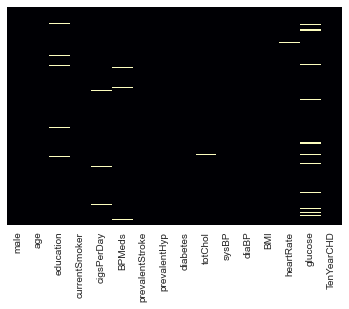

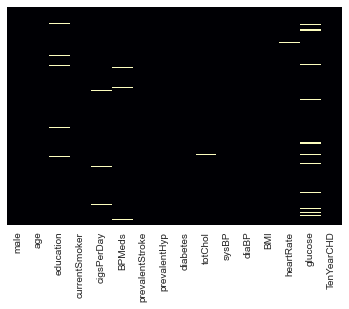

In [10]:
#show the no. of null values 
sns.heatmap(data=data.isnull(),yticklabels=False,
           cbar=False,cmap='magma',annot=False)

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

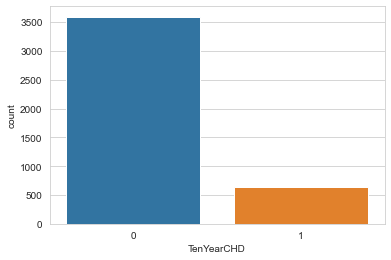

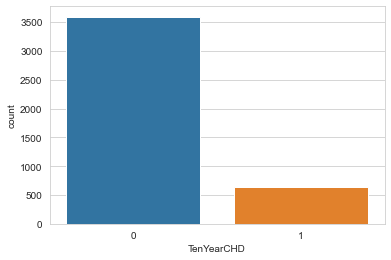

In [11]:
#this will show that which and how much the risk of having heart disease
#result is having heart disease is less chance than having it.
sns.countplot(x='TenYearCHD',data=data)

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

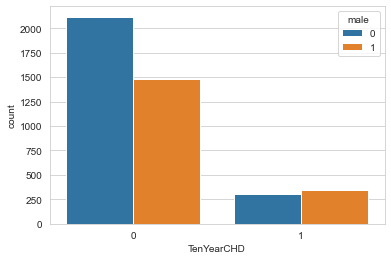

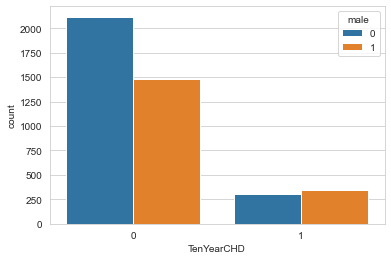

In [12]:
#this show that in male  heart disease is high than female 
sns.countplot(x='TenYearCHD',hue='male',data=data)

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

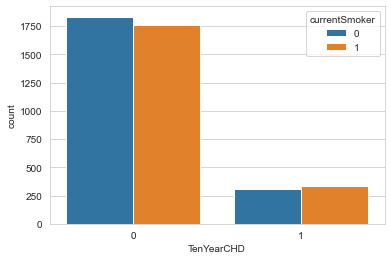

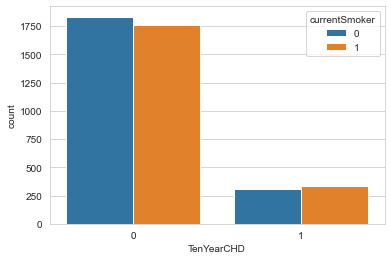

In [13]:
#effect of smoking on ten year CHD
sns.countplot(x='TenYearCHD',hue='currentSmoker',data=data)

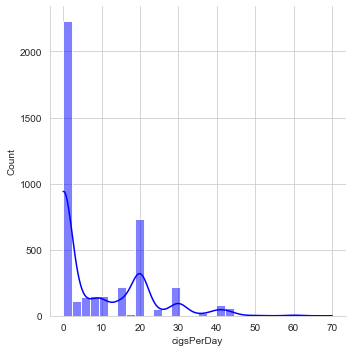

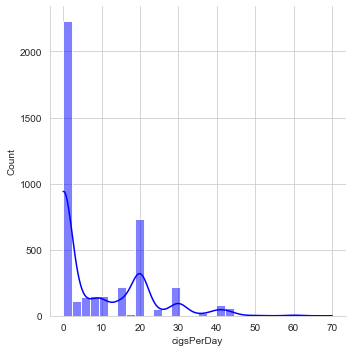

In [14]:
sns.displot(data['cigsPerDay'].dropna(),kde=True,color='blue',bins=30)

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

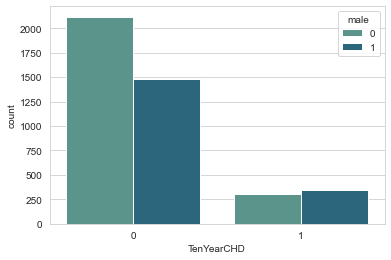

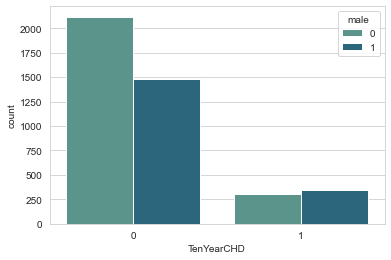

In [15]:
sns.countplot(x="TenYearCHD",hue = 'male',data = data,palette = 'crest')
# 0 is male and 1 is female

<b>Step 5:-</b>DATA PROCESSING

In [16]:
#according to gender,average cigeratte per day 
round(data[['male','cigsPerDay']].groupby('male').mean())

,cigsPerDay
male,
0,6.0
1,13.0


,cigsPerDay
male,
0,6.0
1,13.0


In [17]:
#define a function which is used to fill null values of cigsPerDay column with its average value
def  impute_cigs(cig_sex):
    male=cig_sex[0]
    cigsPerDay=cig_sex[1]
    if pd.isnull(cigsPerDay):
        if male==1:
            return 13
        else:
            return 6
    else:
        return cigsPerDay

In [18]:
#call function using apply method to fill null values
data['cigsPerDay']=data[['male','cigsPerDay']].apply(impute_cigs,axis=1)
data['cigsPerDay'].isnull().sum()


0

0

In [19]:
data['totChol'].fillna(data['totChol'].mean(),inplace=True)

In [20]:
#fill null values of BMI ,with its average value
data['BMI'].fillna(value=data['BMI'].mean(),inplace=True)

In [21]:
#acc. to gender,average BPMeds value
round(data[['male','BPMeds']].groupby('male').mean())

,BPMeds
male,
0,0.0
1,0.0


,BPMeds
male,
0,0.0
1,0.0


In [22]:
#fill null values of BPMeds with its average value which is 0
data['BPMeds'].fillna(0,inplace=True)

In [23]:
#here,education column has  no role to predict TenYearCHD so we drop it.
data.drop(['education'],inplace=True,axis=1)

In [24]:
#according to gender,average glucose level 
round(data[['male','glucose']].groupby('male').mean())

,glucose
male,
0,82.0
1,82.0


,glucose
male,
0,82.0
1,82.0


In [25]:
#fill the null values in glucose column by 82 which is average glucose level
data['glucose'].fillna(82,inplace=True)
data['glucose'].isnull().sum()

0

0

In [26]:
data.dropna(inplace=True)

<AxesSubplot:>

<AxesSubplot:>

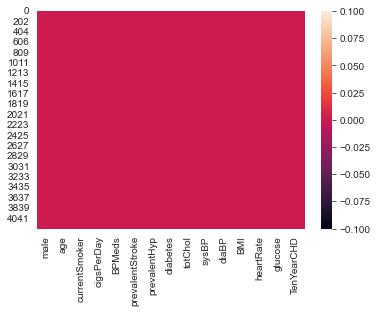

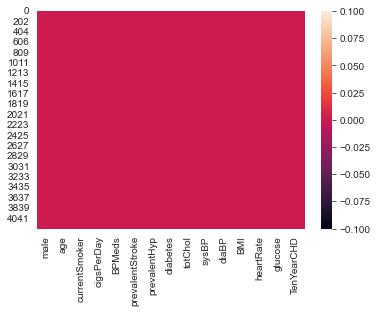

In [27]:
sns.heatmap(data=data.isnull())

<b>Step 6:-</b>SPLITTING DATA

In [28]:
#TenYearCHD is the predict variable so it becomes 'y' and remaining columns are 'x' 
x=data.drop(['TenYearCHD'],axis=1)
y=data['TenYearCHD']

In [29]:
#import train_test_split function to split 'data-->x and y' into testing and training data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y
                                              ,test_size=0.33,random_state=42)
#percentage of test set is 33%.

<b>Step:-7</b>MODEL BUILDING

In [30]:
#import LogisticRegression function to fit the model
from sklearn.linear_model import LogisticRegression
logR=LogisticRegression()

<b>Step 8:-</b>Training

In [31]:
#fit model with training data
logR.fit(X_train,Y_train)

LogisticRegression()

LogisticRegression()

<b>Step 9:-</b>TESTING

In [32]:
#test the data...predict values of y by giving x_test as input
predictions=logR.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

***ACCURACY***

In [33]:
#import accuracy_score function used to check accuracy level of predicted value with observed values
from sklearn.metrics import accuracy_score
perf=accuracy_score(Y_test,predictions)
perf*100#show result as percentage

84.91779842744818

84.91779842744818

<b>Step 10:-</b>EVALUATION

In [34]:
#import metrics used to create cunfusion matrix
from sklearn import metrics

In [35]:
#this will result a matrix which shows us that where errors are made
#rows represent actual outcomes and columns represent prediction we made.
cm=metrics.confusion_matrix(Y_test,predictions)
cm

array([[1175,    7],
       [ 204,   13]], dtype=int64)

array([[1175,    7],
       [ 204,   13]], dtype=int64)

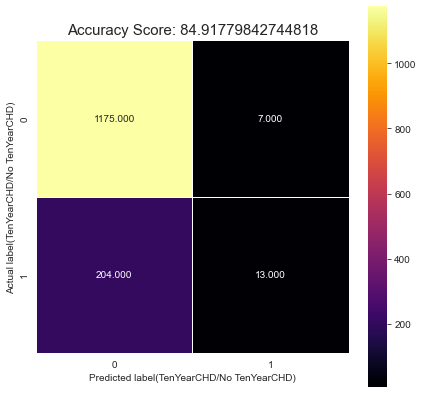

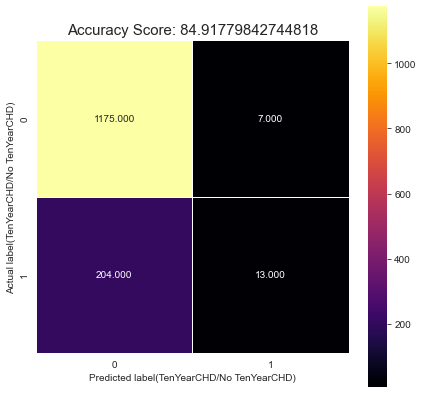

In [36]:
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'inferno');
plt.ylabel('Actual label(TenYearCHD/No TenYearCHD)');
plt.xlabel('Predicted label(TenYearCHD/No TenYearCHD)');
all_sample_title = 'Accuracy Score: {0}'.format(perf*100)
plt.title(all_sample_title, size = 15);

The confusion matrix shows 1175+13 = 1188 correct predictions and 204+7 = 211 incorrect ones.

True Positives: 13

True Negatives: 1175

False Positives: 7 (Type I error)

False Negatives: 204 ( Type II error)

# THANK YOU

In [1]:
ls

 Volume in drive C has no label.
 Volume Serial Number is D6C1-15DF

 Directory of C:\Users\hp\heart_disease_project

24-10-2023  13:37    <DIR>          .
24-10-2023  13:37    <DIR>          ..
24-10-2023  13:37    <DIR>          .ipynb_checkpoints
14-08-2023  17:14               821 final_model.sav
12-08-2023  09:38           195,955 framingham.csv
12-08-2023  12:12            59,801 Heart Disease (1).zip
16-09-2023  09:32           271,005 Project.ipynb
               4 File(s)        527,582 bytes
               3 Dir(s)  106,606,510,080 bytes free


In [3]:
git init

SyntaxError: invalid syntax (Temp/ipykernel_11932/2830201818.py, line 1)